In [1]:
import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torchvision
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import logging
from collections import OrderedDict
from pathlib import Path
from typing import Union, List
from torch.autograd import Variable
from train_contrastive import SiameseNetwork, SiameseNetworkDataset

%matplotlib inline


/data/omran/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/data/omran/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/data/omran/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.13.1-unknown is an invalid version and will not be supported in a future release
  warnings.warn(


In [32]:


def imshow(img, text=None, should_save=False):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic', fontweight='bold',
                 bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


def show_plot(iteration, loss):
    plt.plot(iteration, loss)
    plt.show()


def view_dissimilarity(testDirectory, model_path):
    folder_dataset_test = dset.ImageFolder(root=testDirectory)
    siamese_dataset     = SiameseNetworkDataset(imageFolderDataset=folder_dataset_test,
                                            transform=transforms.Compose(
                                                [
                                                    torchvision.transforms.Resize(
                                                        224),
                                                    torchvision.transforms.CenterCrop(
                                                        224),
                                                    torchvision.transforms.ToTensor(),
                                                ]
                                            )
                                            )

    test_dataloader = DataLoader(
        siamese_dataset, num_workers=1, batch_size=1, shuffle=True)
    dataiter = iter(test_dataloader)
    #x0, _, _ = next(dataiter)

    #device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    model = SiameseNetwork.load_from_checkpoint(model_path).cuda()
    
    cos = torch.nn.CosineSimilarity()

    for i in range(10):
        x0, x1, label = next(dataiter)
        concatenated = torch.cat((x0, x1), 0)
        model.eval()
        output1, output2 = model(Variable(x0).cuda(), Variable(x1).cuda())
        #print(output1)
        #print(output2)
        #euclidean_distance = F.pairwise_distance(output1, output2)
        euclidean_distance = 1- cos(output1, output2)
        #print(euclidean_distance.item())
        imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity (euclidean_distance): {:.14f} , Label {}'.format(euclidean_distance.item(),label))


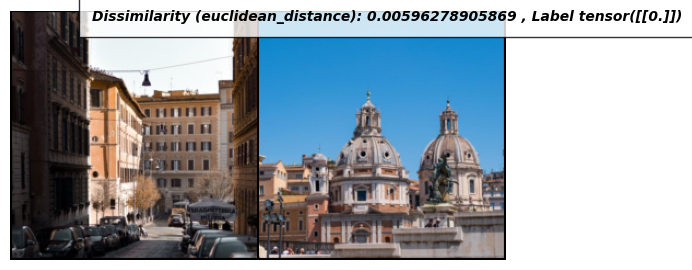

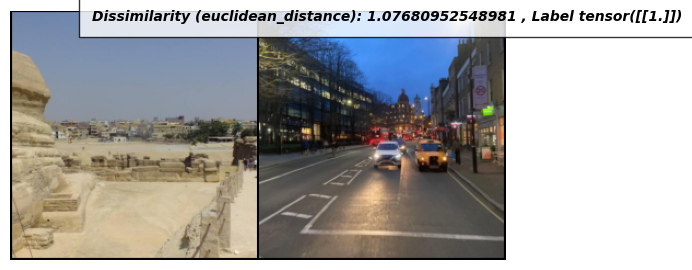

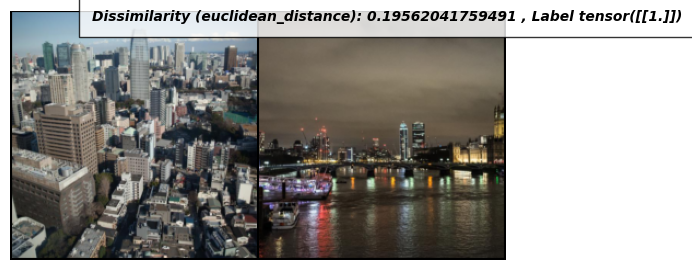

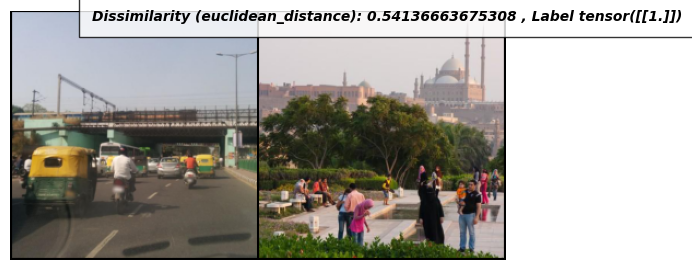

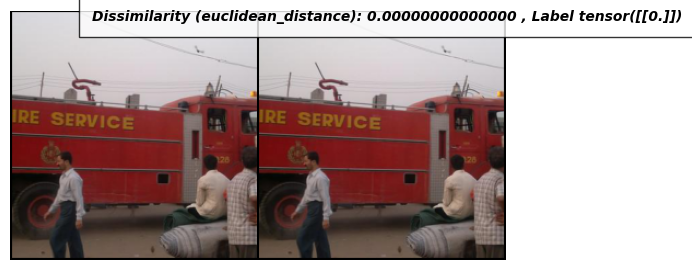

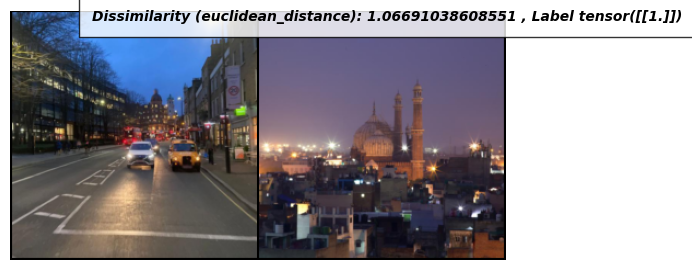

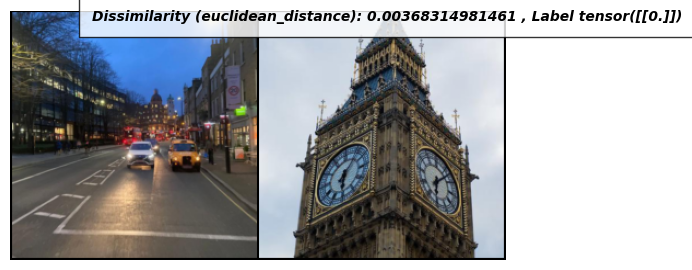

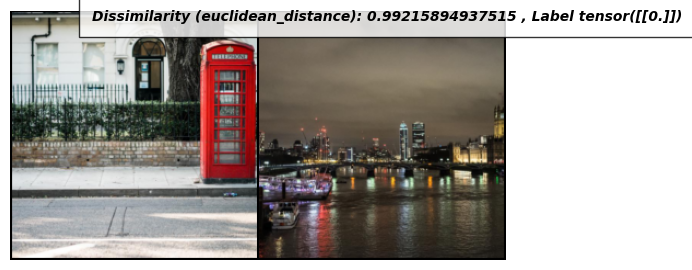

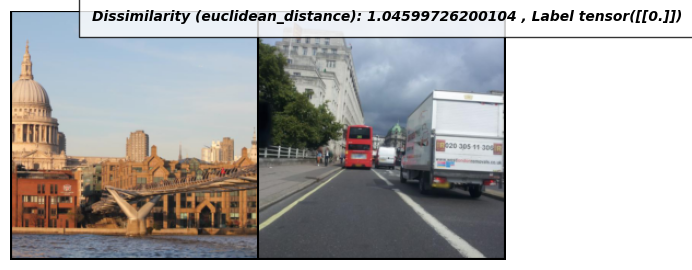

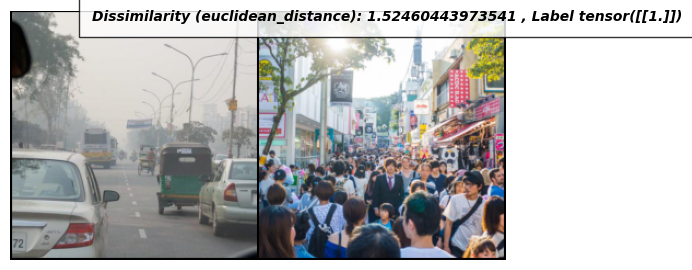

In [39]:
test_path = '/data/omran/cities_data/dataset/cities/test_10_images_ready'
#model_path = 'models/resnet101/220907-1229/ckpts/ckpt.ckpt'
model_path = '/data/omran/cities_data/models/resnet101_64_embedding/220912-0923/ckpts/epoch_34.ckpt'
view_dissimilarity(test_path, model_path)
